# Series
The Series is one building block in pandas. **Pandas Series** is a one-dimensional labeled array that can hold data of any type (integer, string, float, python objects, etc.), similar to a column in an excel spreadsheet. The axis labels are collectively called index. 

If we are given a bag of letters a, b, and c, and count how many of each we have, we find that there are 1 a, 2 b’s, and 3 c’s. We could create a Series by supplying a list of counts and their corresponding labels:

In [ ]:
import pandas as pd

print(pd.Series([1, 2, 3], index=['a', 'b', 'c'])) # with index

a    1
b    2
c    3
dtype: int64


Alternatively, the values can be a numpy array:

In [ ]:
import numpy as np
import pandas as pd

print(pd.Series(np.array([1, 2, 3]), index=['a', 'b', 'c'])) # from a 1darray

a    1
b    2
c    3
dtype: int64


Or, we could use a dictionary to specify the index with keys:

In [ ]:
import pandas as pd

print(pd.Series({'a': 1, 'b': 2, 'c':3})) # from a dict

a    1
b    2
c    3
dtype: int64


If we don’t specify the index, by default, the index would be the integer positions starting from 0.

In a Series, we can access the value by its index directly:

In [ ]:
import pandas as pd

series = pd.Series({'a': 1, 'b': 2, 'c':3})
print(series['a'])

1


Accessing the value by its index, rather than the integer position comes in handy when the dataset is of thousands, if not millions, of rows. Series is the building block for the DataFrame we will introduce next.

# DataFrame
 data science, data is usually more than one-dimensional, and of different data types; thus Series is not sufficient. DataFrames are 2darrays with both row and column labels. One way to create a DataFrame from scratch is to pass in a dict. For example, this week, we sold 3 bottles of red wine to Adam, 6 to Bob, and 5 to Charles. We sold 5 bottles of white wine to Adam, 0 to Bob and 10 to Charles. We can organize the data into a DataFrame by creating a dict 'wine_dict' with the number of bottles of each wine type we sold, then pass it along with the customer names as index to create a DataFrame 'sales'.

In [ ]:
import pandas as pd

wine_dict = {
	'red_wine': [3, 6, 5],
	'white_wine':[5, 0, 10]
}
sales = pd.DataFrame(wine_dict, index=["adam", "bob", "charles"])
print(sales)

         red_wine  white_wine
adam            3           5
bob             6           0
charles         5          10


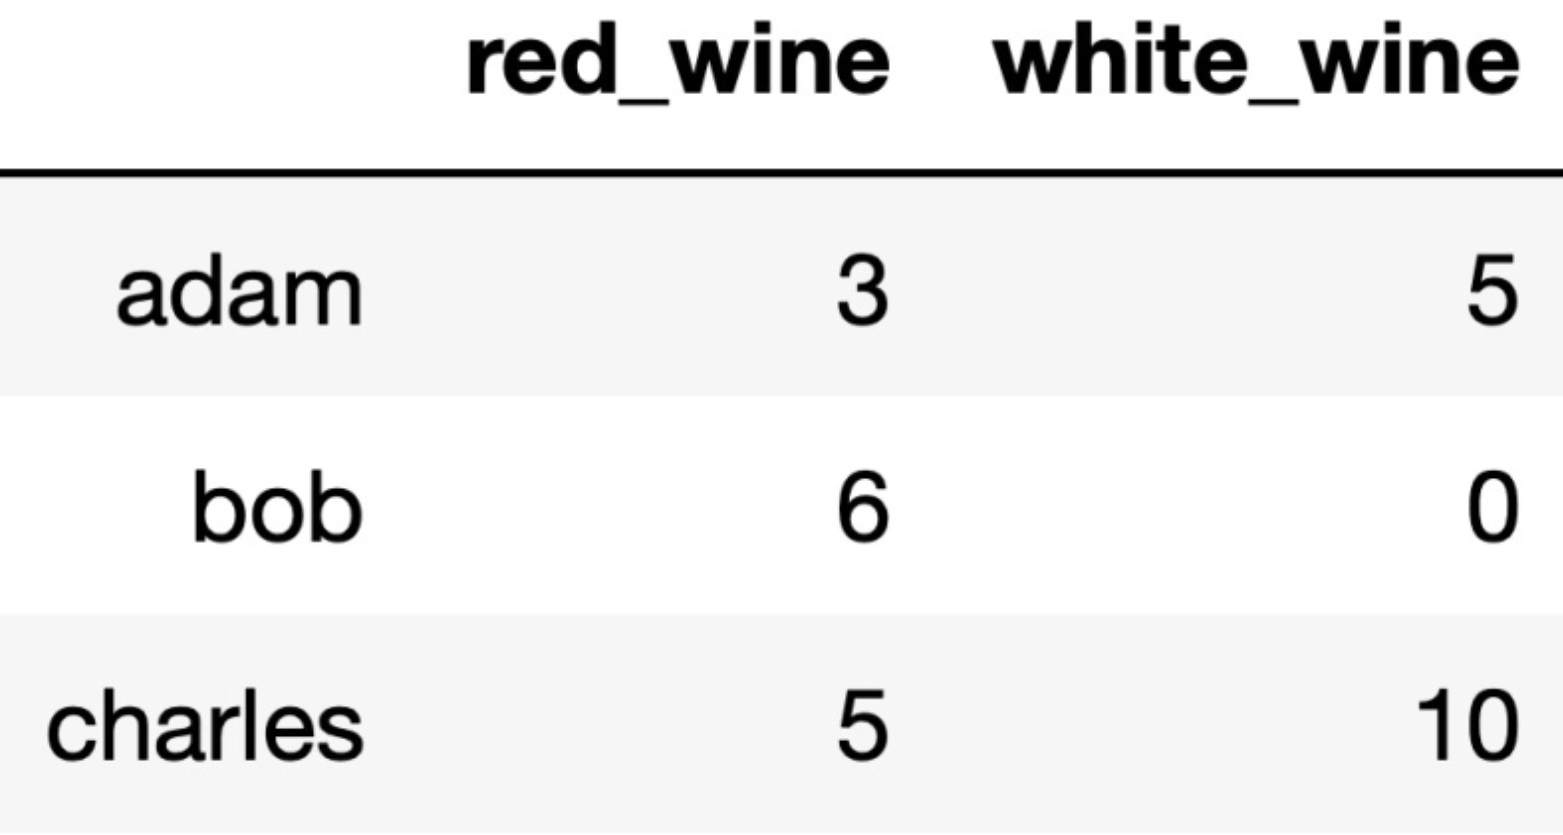

Think of DataFrame as a collection of the Series. Here, sales consists of two Series, one named under "red_wine", the other "white_wine", thus, we can access each series by calling its name:

In [ ]:
import pandas as pd

wine_dict = {
	'red_wine': [3, 6, 5],
	'white_wine':[5, 0, 10]
}
sales = pd.DataFrame(wine_dict, index=["adam", "bob", "charles"])
print(sales['white_wine'])

adam        5
bob         0
charles    10
Name: white_wine, dtype: int64


# Inspect a DataFrame - Shape and Size
Let’s take a look at a new DataFrame, in addition to heights and ages of the presidents, there is information on the order, names and parties. The DataFrame presidents_df is read from a CSV file as follows. Note that index is set to be the names of presidents.


```
import pandas as pd
presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv’, index_col='name')
```
Similar to numpy, to get the dimensions of a DataFrame, use **.shape**



In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.shape)

(45, 4)


There are 45 rows and 4 columns in this DataFrame. To get the number of rows we can access the first element in the tuple.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.shape[0])

45


Size also works on DataFrame to return an integer representing the number of elements in this object.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.size)

180


# Inspect a Dataframe - Head and Tail
Instead of looking at the entire dataset, we can just take a peep. To see the first few lines in a DataFrame, use .head(); if we don’t specify n (the number of lines), by default, it displays the first five rows. Here we want to see the top 3 rows.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.head(n=3))

                   order  age  height                  party
name                                                        
George Washington      1   57     189                   none
John Adams             2   61     170             federalist
Thomas Jefferson       3   57     189  democratic-republican


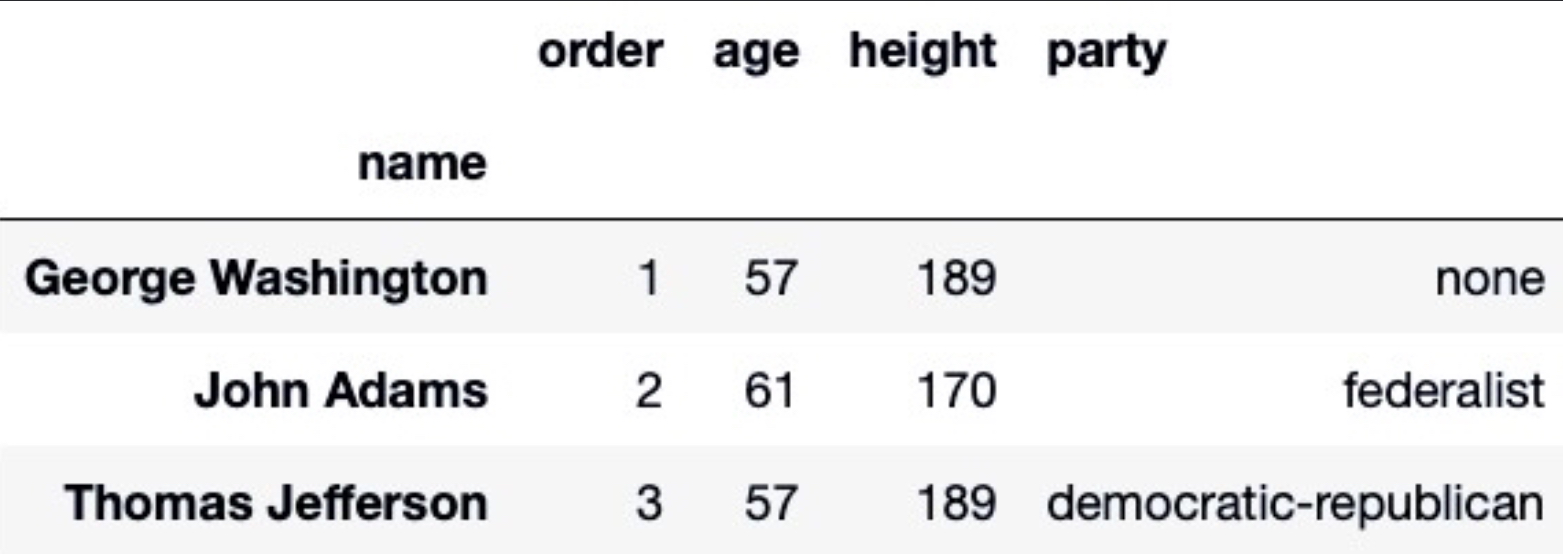

In presidents_df, the index is the name of the president, there are four columns: order, age, height, and party. Similarly, if we want to see the last few rows, we can use .tail(), the default is also five rows.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.tail())

                   order  age  height       party
name                                             
George H. W. Bush     41   64     188  republican
Bill Clinton          42   46     188  democratic
George W. Bush        43   54     182  republican
Barack Obama          44   47     185  democratic
Donald J. Trump       45   70     191  republican


# Inspect a DataFrame - Info
Use .info() to get an overview of the DataFrame. Its output includes index, column names, count of non-null values, dtypes, and memory usage.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
presidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, George Washington to Donald J. Trump
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   order   45 non-null     int64 
 1   age     45 non-null     int64 
 2   height  45 non-null     int64 
 3   party   45 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


The dtype for order, age, and height is integers, while party is an object. The count of non-null values in each column is the same as the number of rows, indicating no missing values.

# Row with .Ioc
Instead of memorizing the integer positions to locate the order, age, height, and party information of Abraham Lincoln, with DataFrame, we can access it by the name using .loc:

.loc[ ] allows us to select data by label or by a conditional statement.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.loc['Abraham Lincoln'])

order             16
age               52
height           193
party     republican
Name: Abraham Lincoln, dtype: object


The result is a pandas Series of shape (4,).

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(type(presidents_df.loc['Abraham Lincoln']))
print(presidents_df.loc['Abraham Lincoln'].shape)

<class 'pandas.core.series.Series'>
(4,)


We can also slice by index. Say we are interested in gathering information on all of the presidents between Abraham Lincoln and Ulysses S. Grant:

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.loc['Abraham Lincoln':'Ulysses S. Grant'])

                  order  age  height           party
name                                                
Abraham Lincoln      16   52     193      republican
Andrew Johnson       17   56     178  national union
Ulysses S. Grant     18   46     173      republican


# Rows with .iloc
Alternatively, if we do know the integer position(s), we can use .iloc to access the row(s).

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.iloc[15])

order             16
age               52
height           193
party     republican
Name: Abraham Lincoln, dtype: object


To gather information from the 16th to 18th presidents, we can then:

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.iloc[15:18])

                  order  age  height           party
name                                                
Abraham Lincoln      16   52     193      republican
Andrew Johnson       17   56     178  national union
Ulysses S. Grant     18   46     173      republican


# Columns
We can retrieve an entire column from presidents_df by name. First we access all the column names:

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.columns)

Index(['order', 'age', 'height', 'party'], dtype='object')


Which returns an index object containing all column names. Then we can access the column height by:

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df['height'])
print(presidents_df['height'].shape)

Which returns a Series containing heights from all U.S. presidents. 

To select multiple columns, we pass the names in a list, resulting in a DataFrame. Remember, we can use .head() to access the first 3 rows as shown below:

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df[['height','age']].head(n=3))

                   height  age
name                          
George Washington     189   57
John Adams            170   61
Thomas Jefferson      189   57


# More with .loc
If we wanted to access columns order, age, and height, we can do it with .loc. .loc allows us to access any of the columns. For example, if we wanted to access columns from order through height for the first three presidents:

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.loc[:, 'order':'height'].head(n=3))

                   order  age  height
name                                 
George Washington      1   57     189
John Adams             2   61     170
Thomas Jefferson       3   57     189


# Min / Max / Mean
It’s not practical to print out an entire dataset with a large sample size. Instead, we want to summarize and characterize sample data using only a few values. Summary statistics include measures of location and measures of spread. Measures of location are quantities that represent the average value of a variable while measures of spread represent how similar or dissimilar the values of a variable are.

Measures of Location - Minimum, Maximum, Mean

Measures of Spread - Range, Variance, Standard Deviation

The simplest summary statistics, which are measures of location, include the minimum, the smallest number:

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.min())

order              1
age               42
height           163
party     democratic
dtype: object


maximum, the largest number:

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.max())

order       45
age         70
height     193
party     whig
dtype: object


and mean, the average:


In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.mean())

order      23.022222
age        55.000000
height    180.000000
dtype: float64


Recall the arithmetic mean is the sum of the elements divided by the number of elements, in python 3.x, division of integers results in a float number.

Once the minimum and maximum are known, we can determine the range, a measure of spread. For example, the height for all U.S. presidents ranges from 163 -- 193 cm.

The mean tells us where the data is centered.  For instance, the average age at the start of the presidency is 54.71 years. Note that mean() can only operate on the numeric values, thus the column 'party' was omitted.

# Quanities
**Quantiles** are cut points dividing the range of the data into continuous intervals with an equal number of observations. Median is the only cut point in 2-quantiles, such that 50% of the data is below the median with the other half above it.

**Quartiles** let us quickly divide a set of data into four groups, making it easy to see which of the four groups a particular data point is in. Quartiles are then 4-quantiles, that is, 25% of the data are between the minimum and first quartile, the next is 25% between the first quartile and median, the next 25% is between the median and the third quartile, and the last 25% of the data lies between the third quartile and the maximum.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df['age'].quantile([0.25, 0.5, 0.75, 1]))

0.25    51.0
0.50    55.0
0.75    58.0
1.00    70.0
Name: age, dtype: float64


Here 25% of presidents started their presidency at 51 years old or younger, while half started their presidency at 55 years old or younger.

Mean and median are usually not of the same value, unless the data is perfectly symmetric. The mean is the average of all the numbers added together and divided by the amount of numbers added. The median is the value separating the higher half from the lower half of the data sample. In the age data, the mean is close to its median, this implies that the data might be symmetric.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df['age'].mean())
print(presidents_df['age'].median())

55.0
55.0


# Variance and Standard Deviation
In probability and statistics, variance is the mean squared deviation of each data point from the mean of the entire dataset. 

You can think of it as how far apart a set of numbers are spread out from their average value. Standard deviation (std) is the square root of variance. A high std implies a large spread, and a low std indicates a small spread, or most points are close to the mean.

In one extreme example, the data consists of all constant 2, there is no variation, thus the variation is 0.0, so is its std:

In [ ]:
import pandas as pd

const = pd.Series([2, 2, 2])

print(const.var())
print(const.std())

0.0
0.0


The mean of [2,3,4] is (2+3+4)/3 = 3.0, and its variation is (2-3)^2 + (3-3)^2 + (4-3)^2 = 1+0+1 = 2. Note that in Python, .var() will return the variance divided by N-1 where N is the length of the data, the output is then 2/(3-1) = 1.

In [ ]:
import pandas as pd

dat = pd.Series([2, 3, 4])

print(dat.mean())
print(dat.var())

3.0
1.0


And the std is just the square root of variance:

In [ ]:
import pandas as pd

dat = pd.Series([2, 3, 4])

print(dat.std())

1.0


For the ages of the presidents:

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df['age'].var())
print(presidents_df['age'].std())

43.5
6.59545297913646


We can apply std on the entire DataFrame to get column-wise standard deviation.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.std())

order     13.136502
age        6.595453
height     6.977236
dtype: float64


# describe()
**describe()** prints out almost all of the **summary statistics** mentioned previously except for the variance. In addition, it counts all non-null values of each column.

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df['age'].describe())
print(presidents_df.describe())

From the output we can see that there are 45 non-null data points of ages, with a mean 55 and std 6.60. The ages range from 42 to 70 with a median 55. Its first and third quartiles are 51 and 58, respectively. Now we have an overall description of all age data. In addition to being applied to a series, describe() can be applied to a DataFrame with multiple columns.

As the count (=45) suggests, there are no null values in any of the three columns. Order is simply an index from 1 to 45. Interestingly, both age and height lie in the interval of roughly the same length, 70-42 = 28 for age while 193-163 = 30 for height. Also both features are of similar standard deviations, indicating a similar spread of the data.

.describe() ignores the null values, such as `NaN` (Not a Number) and generates the descriptive statistics that summarize the central tendency (i.e., mean), dispersion (i.e., standard deviation), and shape (i.e., min, max, and quantiles) of a dataset’s distribution.  

# Categorical Variables
The fourth column 'party' was omitted in the output of .describe() because it is a **categorical variable**. A categorical variable is one that takes on a single value from a limited set of categories. It doesn’t make sense to calculate the mean of democratic, republican, federalist, and other parties. We can check the unique values and corresponding frequency by using .value_counts():

In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df['party'].value_counts())

republican               19
democratic               15
democratic-republican     4
whig                      4
national union            1
none                      1
federalist                1
Name: party, dtype: int64


We can also call .describe() to see that there are 45 non-null values, 7 unique parties, the most frequent party is republican, with a total of 19 presidents belonging to this party.

In [ ]:
 import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df['party'].describe())

count             45
unique             7
top       republican
freq              19
Name: party, dtype: object


# Groupby

Summary statistics on an entire dataset provides a good overall view, but often we’re interested in some calculation conditional upon a given label or category. For example, what is the average height conditional of the presidents party?

To find the value based on a condition, we can use the groupby operation. Think of groupby doing three steps: split, apply, and combine. The split step breaks the DataFrame into multiple DataFrames based on the value of the specified key; the apply step is to perform the operation inside each smaller DataFrame; the last step combines the pieces back into the larger DataFrame







In [ ]:
import pandas as pd

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.groupby('party').mean())

The mean() method is one of many possibilities, you can apply any pandas or numpy aggregation function, or any DataFrame operation, as we demonstrate through this course.

# Agreggetion

We can also perform multiple operations on the groupby object using .agg() method. It takes a string, a function, or a list thereof. For example, we would like to obtain the min, median, and max values of heights grouped by party:

In [ ]:
import pandas as pd
import numpy as np

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.groupby('party')['height'].agg(['min', np.median, max]))

                       min  median  max
party                                  
democratic             168     180  193
democratic-republican  163     177  189
federalist             170     170  170
national union         178     178  178
none                   189     189  189
republican             168     182  193
whig                   173     174  183


From the output we can see, the heights of the democratic presidents range from 168 cm to 193 cm, with a median at 180 cm.

Often time we are interested in different summary statistics for multiple columns. For instance, we would like to check the median and mean of heights, but minimum and maximum for ages, grouped by party. In this case, we can pass a dict with key indicate the column name, and value indicate the functions:

In [ ]:
import pandas as pd
import numpy as np

presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
								  
print(presidents_df.groupby('party')\
	.agg({'height': [np.median, np.mean],
		'age':	[min, max]}))

                      height             age    
                      median        mean min max
party                                           
democratic               180  181.066667  43  65
democratic-republican    177  176.500000  57  58
federalist               170  170.000000  61  61
national union           178  178.000000  56  56
none                     189  189.000000  57  57
republican               182  180.894737  42  70
whig                     174  176.000000  50  68
